# Team Moneyball

## Project Description: 

### Press Sports App users share an environment to engage with others who share similar interests. We are searching for a method to analyze and understand the driving factors of engagement with the app and other users around the country.


In [1]:
# Import dependencies 
import os
import csv 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import requests
import json
from config import gkey
import pprint
import gmaps

# File to Load 
user_data_csv= "user_data.csv"

# Store into Pandas DataFrames
df = pd.read_csv(user_data_csv)

# Display the dataframe head
df.head()


,userId,daysOld,sport,level,classOf,state,school,schoolCount,club,clubCount,...,fanUpOnSuggestedUsers,myProfileViewed,rankingsViewed,postLikes,notificationsReceived,total_invites,daysSinceActive,daysActiveLast30,ActiveLast7,Unnamed: 29
0,v8FXVdBmWTMKygrfh0K24WHm0403,818,Baseball,High School,2024,TX,Pine Tree High School,6.0,Phenom Baseball,5.0,...,11,209,453,1373,2691,3,0,23,1,NaN
1,o16OVYwvfgYiDDzcSsQYDI8ua6d2,734,Baseball,High School,2025,GA,Savannah Christian Preparatory School,2.0,Canes Simpson,3.0,...,1,17,7,62,241,0,97,0,0,NaN
2,wLT1TgISsyeJcRocy682tp3SFD92,695,Baseball,High School,2023,GA,Dutchtown High School,1.0,NaN,NaN,...,3,127,476,1448,2360,0,171,0,0,NaN
3,AaOw4PLV3ZYp3AOVwODmqs1F6zW2,695,Baseball,High School,2023,MI,Rochester High School,10.0,South Oakland A's,18.0,...,0,21,31,49,338,0,4,5,1,NaN
4,7QqiKKMwZqe7JXhJb6NXCsui5au1,695,Baseball,High School,2025,IA,Clinton High School,5.0,NaN,NaN,...,10,262,69,42,776,2,0,18,1,NaN


In [2]:
# Begin data cleaning to fill blank cells and create new categories for users

df['school'] = df['school'].fillna('No_School')
df['club'] = df['club'].fillna('No_Club')
df['clubCount'] = df['clubCount'].fillna(0)
df['interests'] = df['interests'].fillna('None')
df['state'] = df['state'].fillna('No_State')
df['schoolCount'] = df['schoolCount'].fillna(0)


# Notifications Received vs Actions

The r-squared is: 0.5839890811520615


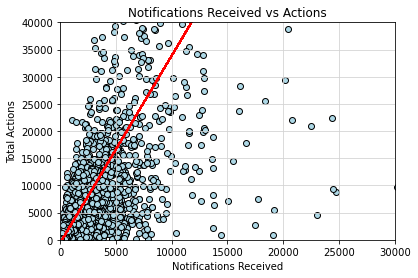

In [3]:
x_values = df['notificationsReceived']
y_values = df['totalActions']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black",facecolors="lightblue")
plt.grid (visible=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(150000,10),fontsize=15,color="red")
plt.xlabel('Notifications Received')
plt.title("Notifications Received vs Actions")
plt.ylabel('Total Actions')
plt.ylim(0,40000)
plt.xlim(0,30000)
plt.savefig("Notifications Received vs Actions.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Notifications Received vs Posts

The r-squared is: 0.5107013991561764


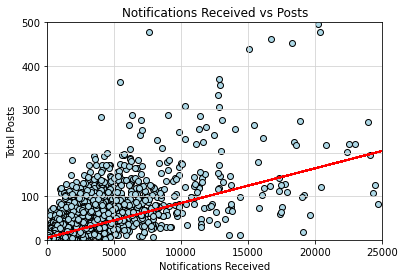

In [4]:
x_values = df['notificationsReceived']
y_values = df['posts']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black",facecolors="lightblue")
plt.grid (visible=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(150000,10),fontsize=15,color="red")
plt.xlabel('Notifications Received')
plt.ylabel('Total Posts')
plt.title("Notifications Received vs Posts")
plt.ylim(0,500)
plt.xlim(0,25000)
plt.savefig("Notifications Received vs Posts.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Followers vs Actions

The r-squared is: 0.6137780797750393


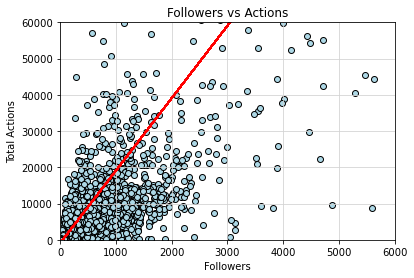

In [5]:
x_values = df['followers']
y_values = df['totalActions']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black",facecolors="lightblue")
plt.grid (visible=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(150000,10),fontsize=15,color="red")
plt.xlabel('Followers')
plt.ylabel('Total Actions')
plt.title("Followers vs Actions")
plt.ylim(0,60000)
plt.xlim(0,6000)
plt.savefig("Followers vs Actions.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Followers vs Posts

The r-squared is: 0.31014429768597135


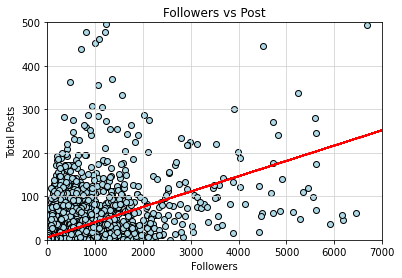

In [6]:
x_values = df['followers']
y_values = df['posts']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black",facecolors="lightblue")
plt.grid (visible=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(150000,10),fontsize=15,color="red")
plt.xlabel('Followers')
plt.ylabel('Total Posts')
plt.title("Followers vs Post")
plt.ylim(0,500)
plt.xlim(0,7000)
plt.savefig("Followers vs Posts.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

# School Count vs Actions

The r-squared is: 0.0005033689007850057


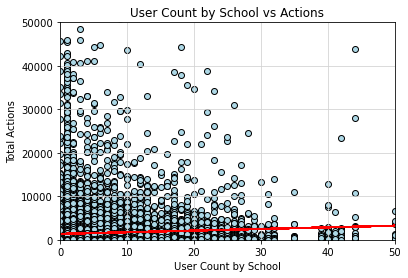

In [8]:
x_values = df['schoolCount']
y_values = df['totalActions']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black",facecolors="lightblue")
plt.grid (visible=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(150000,10),fontsize=15,color="red")
plt.xlabel('User Count by School')
plt.ylabel('Total Actions')
plt.title("User Count by School vs Actions")
plt.ylim(0,50000)
plt.xlim(0,50)
plt.savefig("User Count by School vs Actions.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

# School Count vs Posts

The r-squared is: 0.004256282584207951


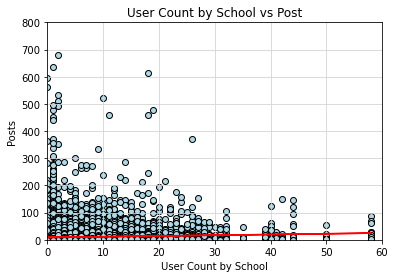

In [9]:
x_values = df['schoolCount']
y_values = df['posts']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black",facecolors="lightblue")
plt.grid (visible=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(150000,10),fontsize=15,color="red")
plt.xlabel('User Count by School')
plt.ylabel('Posts')
plt.title("User Count by School vs Post")
plt.ylim(0,800)
plt.xlim(0,60)
plt.savefig("User Count by School vs Posts.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Statistics 

In [9]:
# define retention (someone who is active)
retention = []

for days in df.daysActiveLast30:
    if days > 0:
        retention.append(True)
    else:
        retention.append(False)
        
df['retention'] = retention
df.head()
df_ret = df[df.retention == True]
df_noret = df[df.retention == False]

#average number of posts for those who are currently active
df_ret['posts'].mean()

14.096464394963363

In [10]:
#average number of posts for those who are not currently active
df_noret['posts'].mean()

6.143106965899155

In [13]:
df

,userId,daysOld,sport,level,classOf,state,school,schoolCount,club,clubCount,...,myProfileViewed,rankingsViewed,postLikes,notificationsReceived,total_invites,daysSinceActive,daysActiveLast30,ActiveLast7,Unnamed: 29,retention
0,v8FXVdBmWTMKygrfh0K24WHm0403,818,Baseball,High School,2024,TX,Pine Tree High School,6.0,Phenom Baseball,5.0,...,209,453,1373,2691,3,0,23,1,NaN,True
1,o16OVYwvfgYiDDzcSsQYDI8ua6d2,734,Baseball,High School,2025,GA,Savannah Christian Preparatory School,2.0,Canes Simpson,3.0,...,17,7,62,241,0,97,0,0,NaN,False
2,wLT1TgISsyeJcRocy682tp3SFD92,695,Baseball,High School,2023,GA,Dutchtown High School,1.0,No_Club,0.0,...,127,476,1448,2360,0,171,0,0,NaN,False
3,AaOw4PLV3ZYp3AOVwODmqs1F6zW2,695,Baseball,High School,2023,MI,Rochester High School,10.0,South Oakland A's,18.0,...,21,31,49,338,0,4,5,1,NaN,True
4,7QqiKKMwZqe7JXhJb6NXCsui5au1,695,Baseball,High School,2025,IA,Clinton High School,5.0,No_Club,0.0,...,262,69,42,776,2,0,18,1,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31207,eW92VPBnY0Zn7db34hSngWrVoo43,52,Football,High School,2024,No_State,No_School,0.0,No_Club,0.0,...,1,0,0,13,0,51,0,0,NaN,False
31208,aMutRukWR9U7dlEgd4CSgVwQic72,52,Volleyball (W),High School,2024,PA,Derry Area High School,5.0,No Touch,5.0,...,4,0,0,28,1,50,0,0,NaN,False
31209,LNECt6CSsPWMzqMulBa6S3rpcfP2,52,Baseball,High School,2025,NY,Oyster Bay High School,1.0,Eagles Baseball Club,19.0,...,5,14,0,27,1,10,2,0,NaN,True
31210,PuljuenBWJTziKMFS5JZLZemNv23,52,Football,Middle School,2027,FL,No_School,0.0,Pop Warner League,5.0,...,15,0,0,41,0,27,2,0,NaN,True


In [12]:
df[['school','state']].nunique()

school    11248
state        63
dtype: int64

In [12]:
Fresh_df = pd.read_csv(user_data_csv)
Fresh_df = Fresh_df.drop(columns=['Unnamed: 29'])
Fresh_df

,userId,daysOld,sport,level,classOf,state,school,schoolCount,club,clubCount,...,totalFeedSessions,fanUpOnSuggestedUsers,myProfileViewed,rankingsViewed,postLikes,notificationsReceived,total_invites,daysSinceActive,daysActiveLast30,ActiveLast7
0,v8FXVdBmWTMKygrfh0K24WHm0403,818,Baseball,High School,2024,TX,Pine Tree High School,6.0,Phenom Baseball,5.0,...,450,11,209,453,1373,2691,3,0,23,1
1,o16OVYwvfgYiDDzcSsQYDI8ua6d2,734,Baseball,High School,2025,GA,Savannah Christian Preparatory School,2.0,Canes Simpson,3.0,...,25,1,17,7,62,241,0,97,0,0
2,wLT1TgISsyeJcRocy682tp3SFD92,695,Baseball,High School,2023,GA,Dutchtown High School,1.0,NaN,NaN,...,315,3,127,476,1448,2360,0,171,0,0
3,AaOw4PLV3ZYp3AOVwODmqs1F6zW2,695,Baseball,High School,2023,MI,Rochester High School,10.0,South Oakland A's,18.0,...,34,0,21,31,49,338,0,4,5,1
4,7QqiKKMwZqe7JXhJb6NXCsui5au1,695,Baseball,High School,2025,IA,Clinton High School,5.0,NaN,NaN,...,224,10,262,69,42,776,2,0,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31207,eW92VPBnY0Zn7db34hSngWrVoo43,52,Football,High School,2024,NaN,NaN,NaN,NaN,NaN,...,5,0,1,0,0,13,0,51,0,0
31208,aMutRukWR9U7dlEgd4CSgVwQic72,52,Volleyball (W),High School,2024,PA,Derry Area High School,5.0,No Touch,5.0,...,13,3,4,0,0,28,1,50,0,0
31209,LNECt6CSsPWMzqMulBa6S3rpcfP2,52,Baseball,High School,2025,NY,Oyster Bay High School,1.0,Eagles Baseball Club,19.0,...,12,1,5,14,0,27,1,10,2,0
31210,PuljuenBWJTziKMFS5JZLZemNv23,52,Football,Middle School,2027,FL,NaN,NaN,Pop Warner League,5.0,...,28,18,15,0,0,41,0,27,2,0


In [13]:
No_NaN_df = Fresh_df.dropna(how = 'any')
No_NaN_df

,userId,daysOld,sport,level,classOf,state,school,schoolCount,club,clubCount,...,totalFeedSessions,fanUpOnSuggestedUsers,myProfileViewed,rankingsViewed,postLikes,notificationsReceived,total_invites,daysSinceActive,daysActiveLast30,ActiveLast7
0,v8FXVdBmWTMKygrfh0K24WHm0403,818,Baseball,High School,2024,TX,Pine Tree High School,6.0,Phenom Baseball,5.0,...,450,11,209,453,1373,2691,3,0,23,1
1,o16OVYwvfgYiDDzcSsQYDI8ua6d2,734,Baseball,High School,2025,GA,Savannah Christian Preparatory School,2.0,Canes Simpson,3.0,...,25,1,17,7,62,241,0,97,0,0
3,AaOw4PLV3ZYp3AOVwODmqs1F6zW2,695,Baseball,High School,2023,MI,Rochester High School,10.0,South Oakland A's,18.0,...,34,0,21,31,49,338,0,4,5,1
5,QwVRMqeGRaRzwGpCdyL7NDoQu1A2,695,Volleyball (W),High School,2024,SC,Wando High School,1.0,Carolina Rogue,41.0,...,4542,5282,729,1180,9180,16184,6,2,2,1
8,v4VnYN3jC1c3TwfzXd1MWK0QRRc2,695,Baseball,Middle School,2026,AZ,South Valley Junior High,1.0,Nomadic Baseball,21.0,...,152,61,128,51,431,1211,5,3,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31162,lISh4J82UEa6RqTmFu6K36Rz1nC3,52,Volleyball (W),High School,2024,CA,Valley Center High School,11.0,Starlings Volleyball Club Escondido,2.0,...,26,0,27,7,25,95,0,5,8,1
31163,1z5uV0ZsFEb5r3WfLdAhi4DeOIj1,52,Football,High School,2025,AL,Smiths Station High School,1.0,Smiths Station Basketball,3.0,...,75,0,23,9,11,96,1,5,3,1
31170,jN2CDmkzxmWPQAIcmpDGwN0VSKg1,52,Volleyball (W),Middle School,2026,AZ,Queen Creek Junior High,2.0,East Side Blaze Volleyball Club,6.0,...,21,0,29,78,177,293,0,1,18,1
31182,jiMOTyCXONUXcbpuelR9ixnF98L2,52,Baseball,High School,2026,NJ,St. Joesph High School,1.0,Northeast Monarchs,7.0,...,51,0,12,12,3,56,1,8,2,0


In [14]:
School_State_df = pd.DataFrame(No_NaN_df.groupby(['state','school']).count()['userId'])
School_State_df

userId
state school                               
AK    Archbishop Rummel High School       1
      Ballenas Secondary School           1
      Boston Latin                        1
      Chugiak High School                 1
      Colony High School                  1
...                                     ...
WV    university high school              1
WY    Central High School                 1
      Cheyenne South High School          1
      Cody High School                    1
      Tongue River Middle School          1

[5379 rows x 1 columns]

In [15]:
School_State_df['school'] = df['school'].drop(0)
School_State_df['state'] = df['school'].drop(0)

In [ ]:
Lats = []
Longs = []

base_url = f"https://maps.googleapis.com/maps/api/geocode/json?key={gkey}&address="

for school in School_State_df.index:
    schoolname = f'{school[1]}, {school[0]}'
    try:
        response = requests.get(base_url + schoolname).json()
        Lats.append(response["results"][0]["geometry"]["location"]["lat"])
        Longs.append(response["results"][0]["geometry"]["location"]["lng"])
        #pprint.pprint(response)
        #print(f'added {schoolname}')
        
    except:
        #print(f'{schoolname} not found')
        Lats.append(np.nan)
        Longs.append(np.nan)
    #print('--------------------')    
    
    
    
    
School_State_df['Lat'] = Lats
School_State_df['Long'] = Longs

In [ ]:
School_State_df

In [ ]:
School_State_df.to_csv("School_State_Data.csv", index=True, header=True)

In [ ]:

school_state_data_csv= "School_State_Data.csv"
school_df = pd.read_csv(school_state_data_csv)
school_clean_df = school_df.drop(columns=['school.1','state.1'])
school_nonan_df = school_clean_df.dropna(how = 'any')
# school_nonan_df
small_df = school_nonan_df
small_df

In [ ]:

# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{school}</dd>
<dt>City</dt><dd>{state}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
school_info = [info_box_template.format(**row) for index, row in small_df.iterrows()]
locations = small_df[["Lat", "Long"]]

In [ ]:
gmaps.configure(api_key=gkey)
# Assign the marker layer to a variable
locations = small_df[["Lat", "Long"]].astype(float)
# markers = gmaps.marker_layer(locations)
fig = gmaps.figure()
# Create hotel symbol layer
# school_layer = gmaps.symbol_layer(locations,info_box_content=school_info)
countperschool= small_df["userId"]
heat_layer = gmaps.heatmap_layer(locations, weights=countperschool, 
                                 dissipating=False, max_intensity=50,
                                 point_radius = 1)
# Add the layer to the map
# fig.add_layer(markers)
# fig.add_layer(school_layer)
fig.add_layer(heat_layer)
fig